In [1]:
import multimodal_cci as mmcci
import scanpy as sc
import stlearn as st
import numpy as np
from matplotlib import pyplot as plt

2024-02-09 15:04:32.285478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 15:04:32.426911: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-09 15:04:32.430320: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-09 15:04:32.430346: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

#### Load stLearn data objects

In [2]:
brain_aged_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1C_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1D_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1D_CCI.h5ad")
    ]

brain_young_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1C_CCI.h5ad")
    ]

brain_aged_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A4_CCI_bin80.h5ad")
    ]
brain_young_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y4_CCI_bin80.h5ad")
    ]

brain_aged_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech1]
brain_young_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech1]
brain_aged_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech2]
brain_young_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech2]

brain_aged_tech1_sizes = [sample.shape[0] for sample in brain_aged_tech1]
brain_young_tech1_sizes = [sample.shape[0] for sample in brain_young_tech1]
brain_aged_tech2_sizes = [sample.shape[0] for sample in brain_aged_tech2]
brain_young_tech2_sizes = [sample.shape[0] for sample in brain_young_tech2]

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': plt.colormaps.get_cmap('tab10').colors[0],
    'Astrocytes': plt.colormaps.get_cmap('tab10').colors[1],
    'Vascular': plt.colormaps.get_cmap('tab10').colors[2],
    'Oligos': plt.colormaps.get_cmap('tab10').colors[3],
    'Neurons': plt.colormaps.get_cmap('tab10').colors[4],
    'Microglia': plt.colormaps.get_cmap('tab10').colors[5],
    'Immune': plt.colormaps.get_cmap('tab10').colors[6]
}

#### Normalise each group of samples

In [4]:
brain_aged_tech1_normalised = mmcci.it.normalise_within_tech(brain_aged_tech1_cci, brain_aged_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_young_tech1_normalised = mmcci.it.normalise_within_tech(brain_young_tech1_cci, brain_young_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_aged_tech2_normalised = mmcci.it.normalise_within_tech(brain_aged_tech2_cci, brain_aged_tech2_sizes, target=brain_young_tech2_sizes[0])
brain_young_tech2_normalised = mmcci.it.normalise_within_tech(brain_young_tech2_cci, brain_young_tech2_sizes, target=brain_young_tech2_sizes[0])

In [5]:
# for sample in brain_young_tech2_normalised:
#     overall_sample = mmcci.it.calculate_overall_interactions(sample)
#     mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

#### Integrate within technologies

In [6]:
brain_aged_tech1_integrated = mmcci.it.integrate_samples(brain_aged_tech1_normalised)
brain_young_tech1_integrated = mmcci.it.integrate_samples(brain_young_tech1_normalised)
brain_aged_tech2_integrated = mmcci.it.integrate_samples(brain_aged_tech2_normalised)
brain_young_tech2_integrated = mmcci.it.integrate_samples(brain_young_tech2_normalised)

In [7]:
# overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech2_integrated)
# mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

#### Normalise samples between technologies

In [8]:
aged_normalised = mmcci.it.normalise_between_tech([brain_aged_tech1_integrated, brain_aged_tech2_integrated])
young_normalised = mmcci.it.normalise_between_tech([brain_young_tech1_integrated, brain_young_tech2_integrated])

#### Integrate between technologies for both groups

In [9]:
aged_integrated = mmcci.it.integrate_samples(aged_normalised)
young_integrated = mmcci.it.integrate_samples(young_normalised)

#### Calculate overall interactions network per group

In [10]:
aged_overall = mmcci.it.calculate_overall_interactions(aged_integrated)
young_overall = mmcci.it.calculate_overall_interactions(young_integrated)

# mmcci.plt.network_plot(aged_overall, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)
# mmcci.plt.network_plot(young_overall, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

# mmcci.plt.chord_plot(aged_overall, colors=colors)
# mmcci.plt.chord_plot(young_overall, colors=colors)

#### Rank LR pairs based on dissimilarity between groups

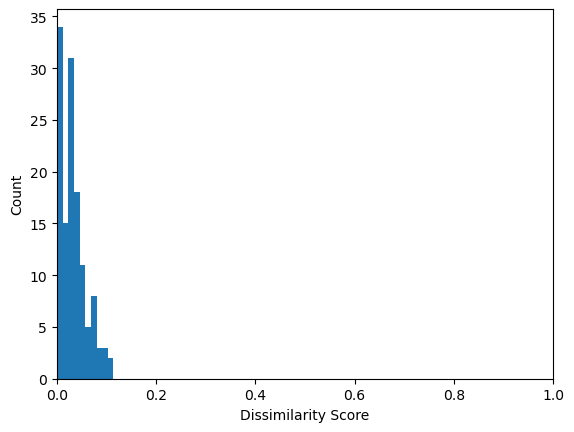

Overall Network Aged vs Young Dissimilarity Score is: 0.23906891519232853


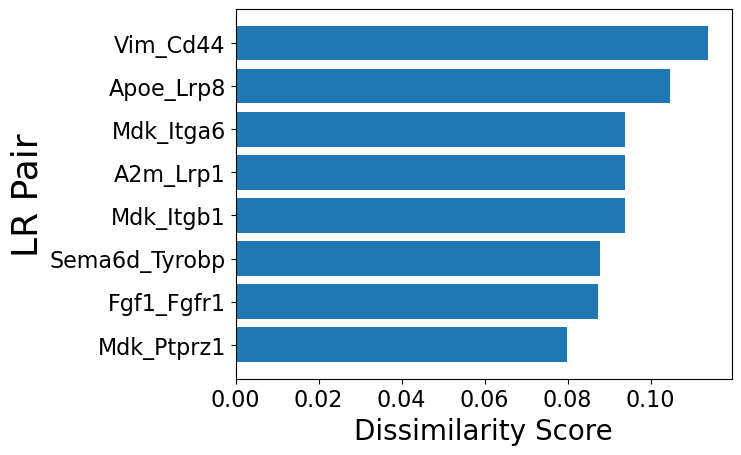

In [11]:
dissimilarity_scores = mmcci.an.calculate_dissim(aged_integrated, young_integrated)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_overall, young_overall)))

# mmcci.plt.lr_top_dissimilarity(dissimilarity_scores)

sorted_items = sorted(
    dissimilarity_scores.items(), key=lambda x: x[1], reverse=False
)
top_n_items = sorted_items[-8:]
keys, values = zip(*top_n_items)

plt.barh(keys, values)
plt.xlabel("Dissimilarity Score", fontsize=20)
plt.ylabel("LR Pair", fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=16)  # Modify the tick label font size
plt.show()

#### Plot highly dissimilar pairs between groups

In [12]:
# mmcci.plt.network_plot(aged_integrated['Vim_Cd44'])
# mmcci.plt.network_plot(young_integrated['Vim_Cd44'])

#### Calculate p values for significance changes between groups

In [13]:
p_values = mmcci.an.perm_test(aged_overall, young_overall)
p_values

Astrocytes  Ependymal   Immune  Microglia  Neurons   Oligos  \
Astrocytes         0.01565    0.29536  0.29644    0.29783  0.02965  0.07780   
Ependymal          0.24874    0.00000  0.29802    0.29568  0.11185  0.23656   
Immune             0.29803    0.29834  0.29612    0.29654  0.29583  0.29818   
Microglia          0.29767    0.29581  0.29611    0.29866  0.29894  0.29853   
Neurons            0.06266    0.14047  0.29596    0.29609  0.18784  0.15853   
Oligos             0.09354    0.27967  0.29612    0.29890  0.20119  0.04693   
PeripheralGlia     0.29600    0.29862  0.29685    0.29385  0.29480  0.29791   
Vascular           0.21966    0.29658  0.29842    0.29708  0.12555  0.29493   

                PeripheralGlia  Vascular  
Astrocytes             0.29465   0.26490  
Ependymal              0.29930   0.29714  
Immune                 0.29435   0.29663  
Microglia              0.29767   0.29606  
Neurons                0.29679   0.17082  
Oligos                 0.29705   0.29624  
PeripheralGlia         0.29927   0.29618  
Vascular               0.29820   0.29685

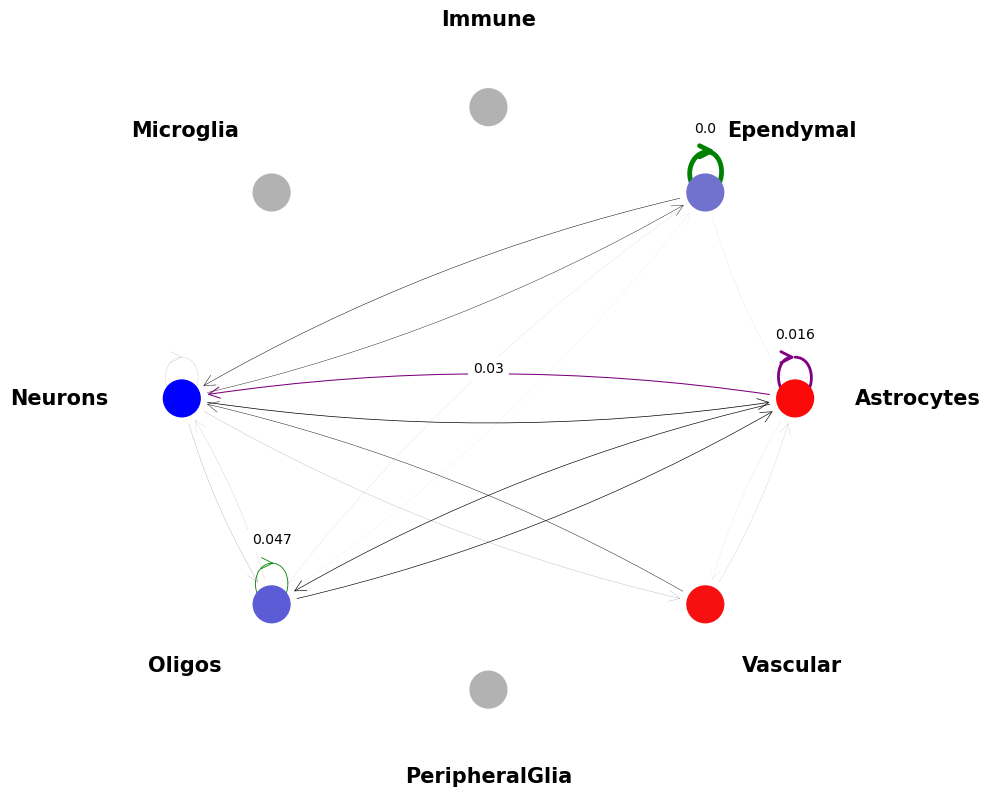

In [14]:
age_diff = mmcci.an.get_network_diff(aged_overall, young_overall)
mmcci.plt.network_plot(age_diff, p_values)

#### Plot aged and young overall networks

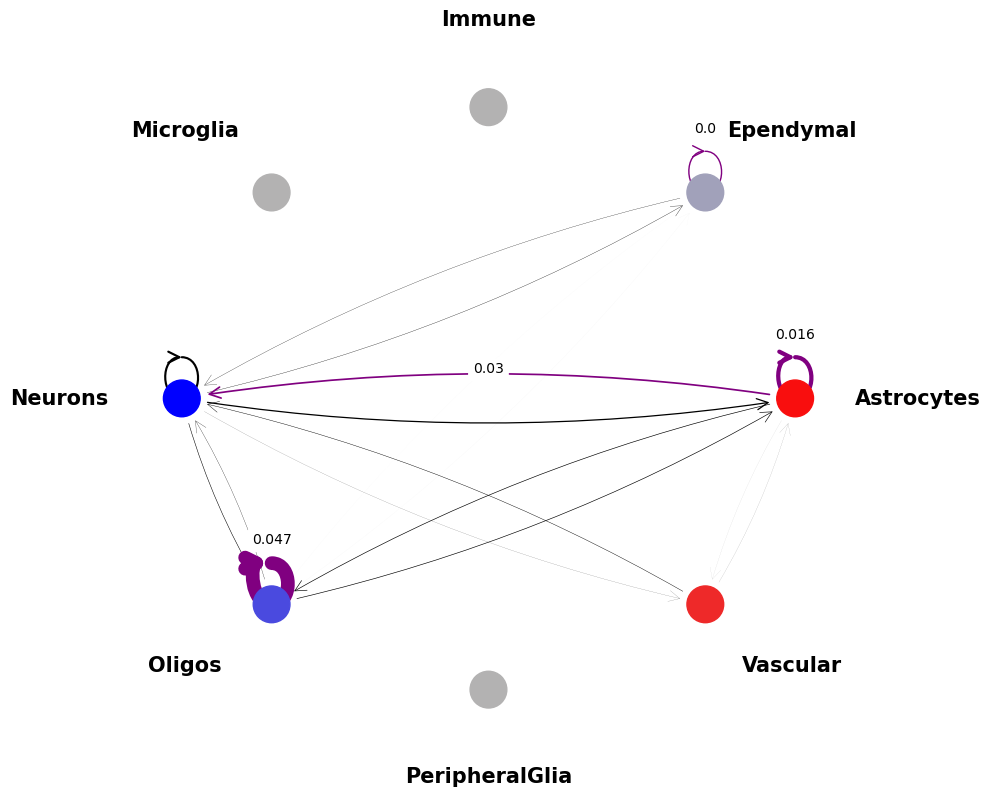

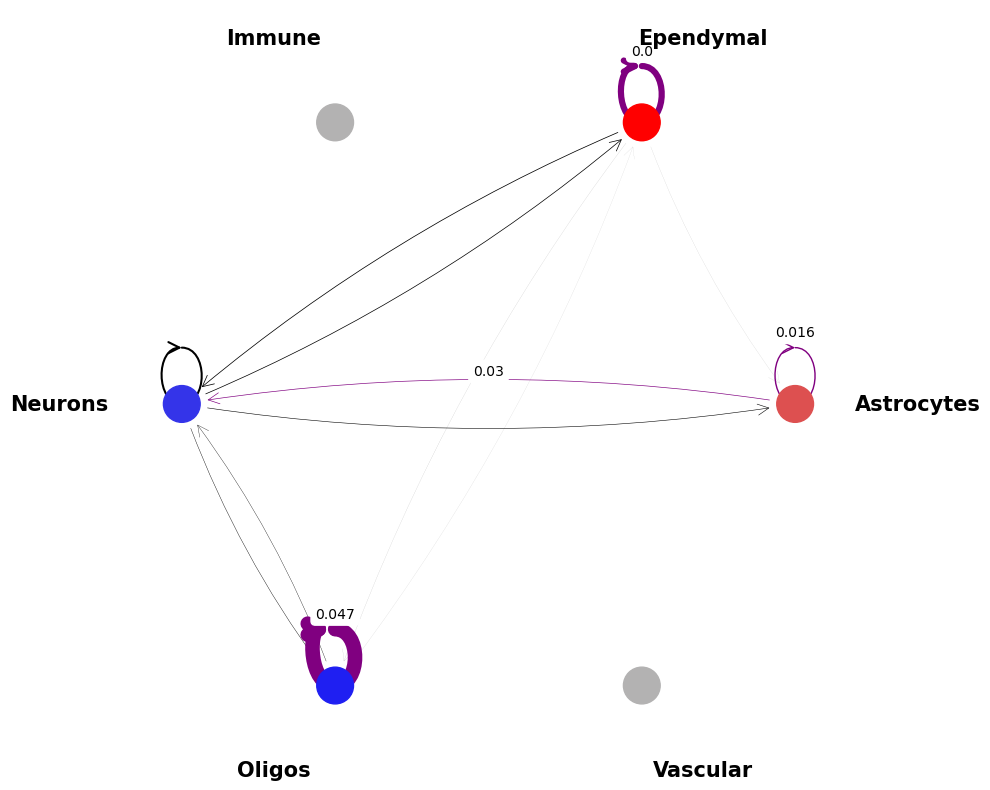

In [15]:
mmcci.plt.network_plot(aged_overall, p_values)
mmcci.plt.network_plot(young_overall, p_values)

#### Get LR pairs from Astrocytes to Neurons

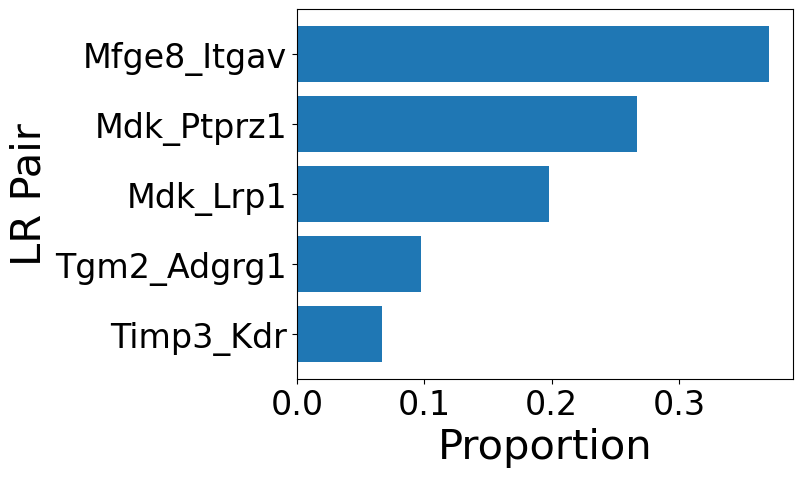

In [16]:
n=10
pairs = mmcci.an.get_lrs_per_celltype(young_integrated, "Astrocytes", "Neurons")
keys = list(pairs.keys())[:n]
values = list(pairs.values())[:n]
keys.reverse()
values.reverse()
plt.barh(keys, values)
plt.xlabel("Proportion", fontsize=30)  # Increase the font size of the x-axis label
plt.ylabel("LR Pair", fontsize=30)  # Increase the font size of the y-axis label
plt.tick_params(axis='both', which='major', labelsize=24)  # Increase the font size of the tick labels


#### Cluster Aged and Young LR Pairs

In [17]:
aged_clusters = mmcci.an.lr_grouping(aged_integrated, n_clusters=0)
aged_integrated_clusters = mmcci.an.subset_clusters(aged_integrated, aged_clusters)
aged_overall_clusters = mmcci.an.calculate_cluster_interactions(aged_integrated_clusters)

Computing Dissimilarity Scores for multiple interactions...


Processing:   7%|▋         | 9/131 [00:00<00:05, 21.17it/s]

Processing: 100%|██████████| 131/131 [00:06<00:00, 21.22it/s]
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 154/154 [00:09<00:00, 16.16it/s]
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...



cluster0: Contains 26 LR pairs


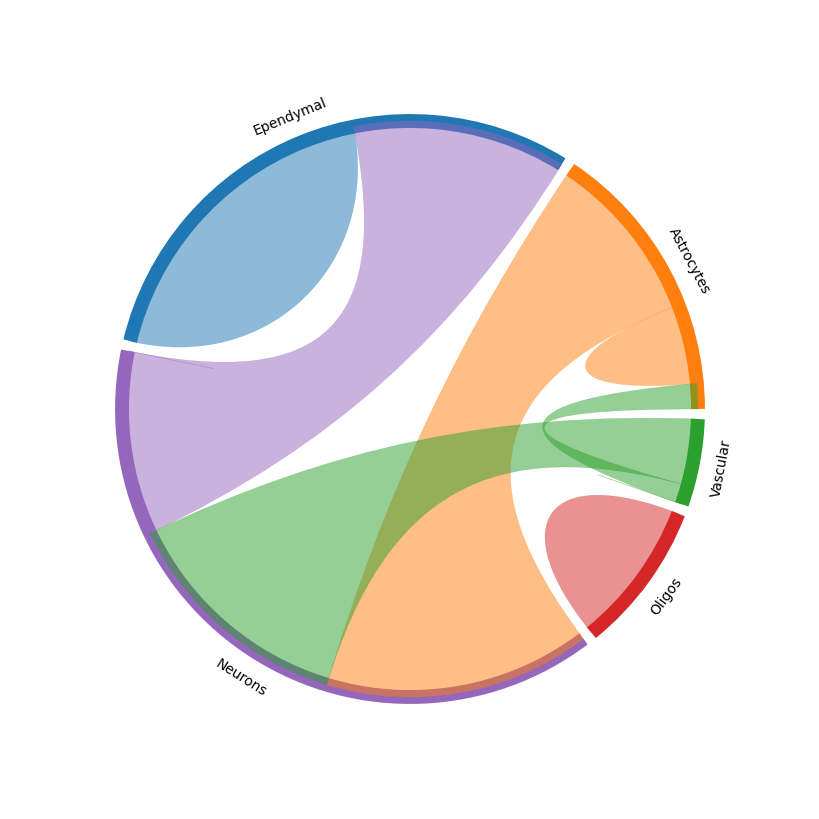


cluster1: Contains 48 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


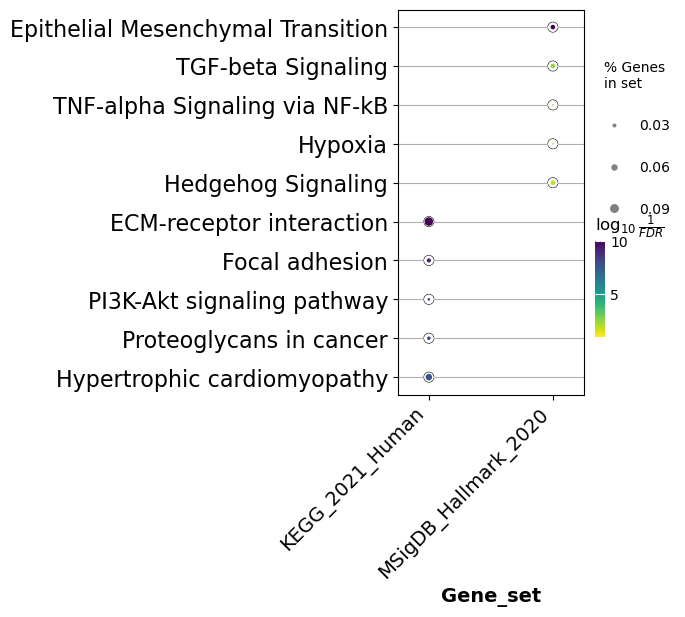

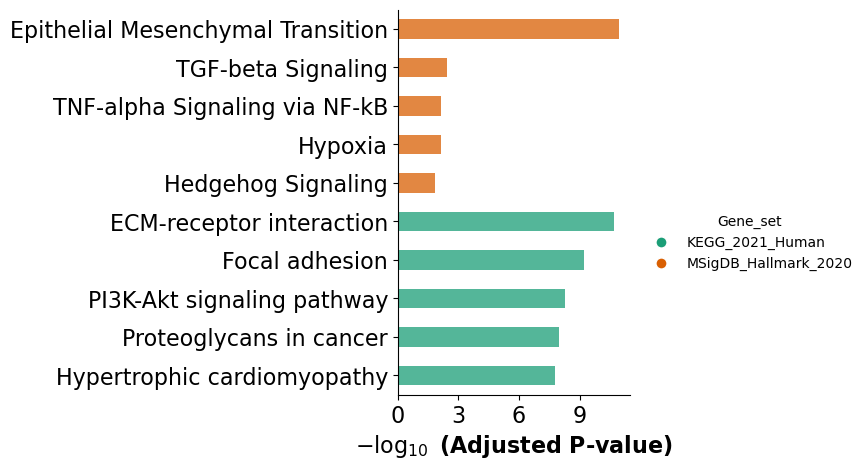

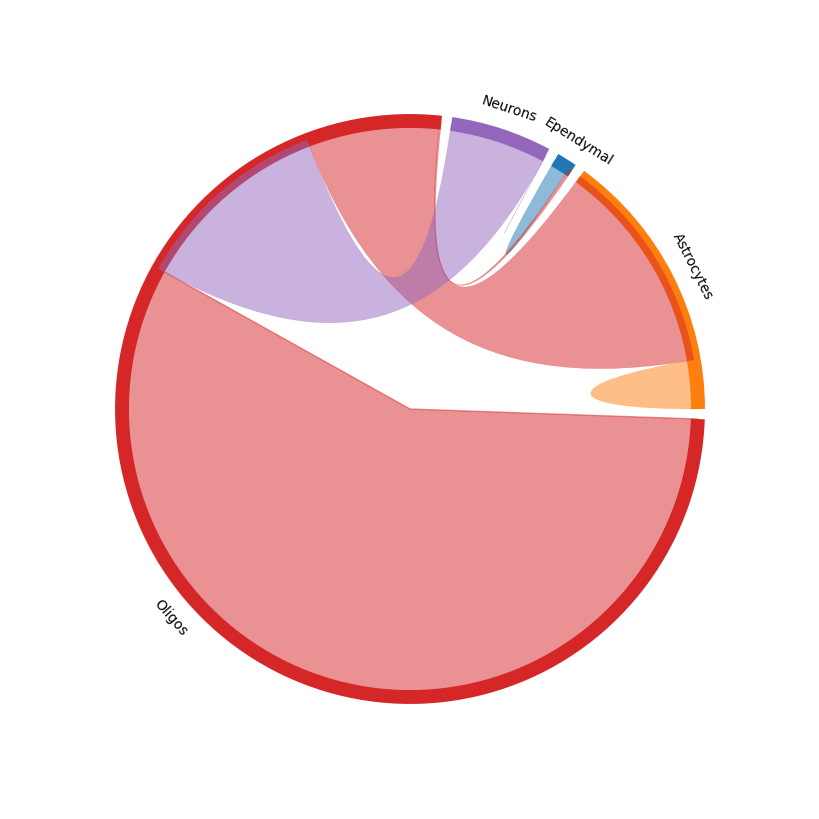


cluster2: Contains 28 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


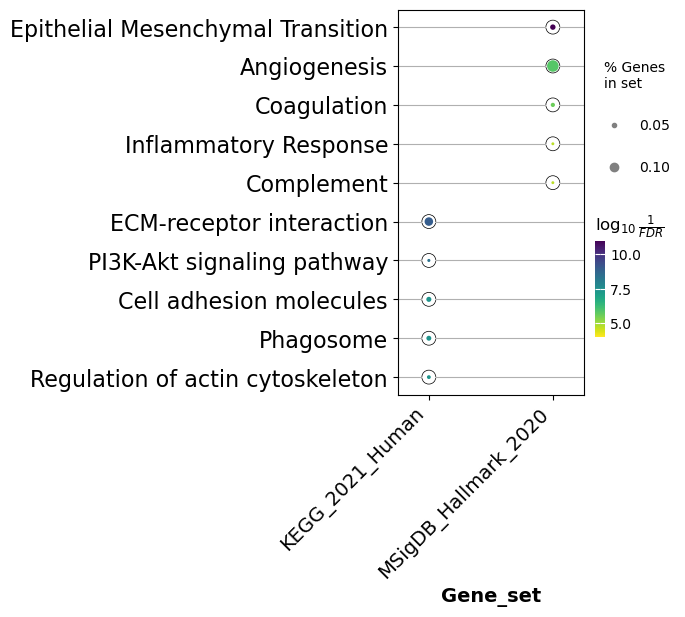

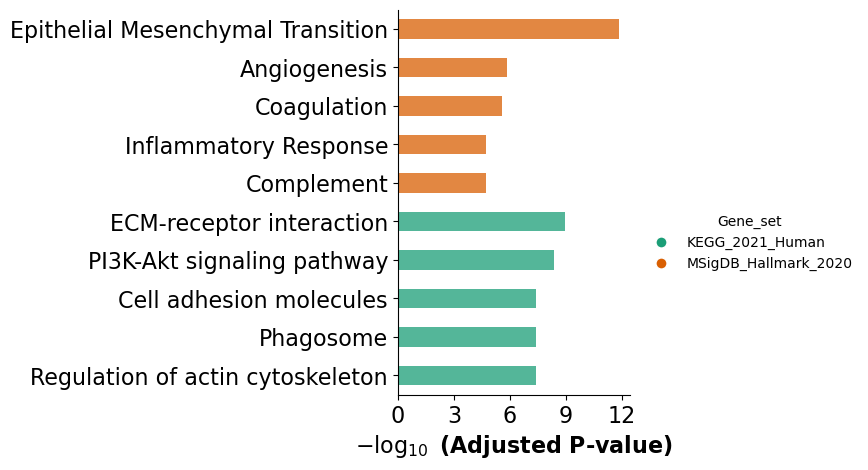

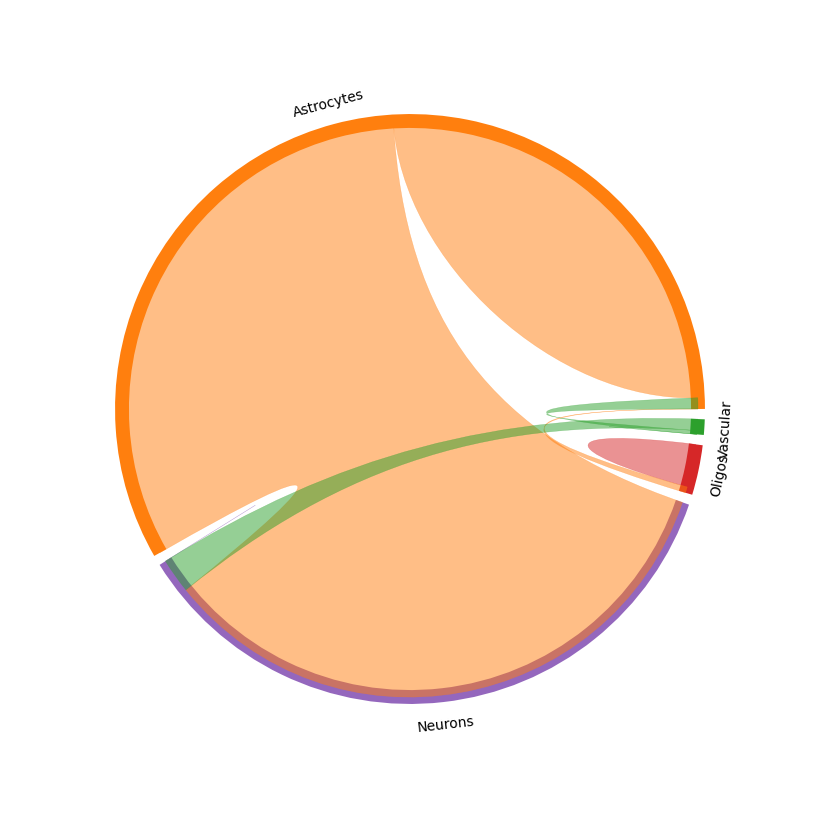


cluster3: Contains 29 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


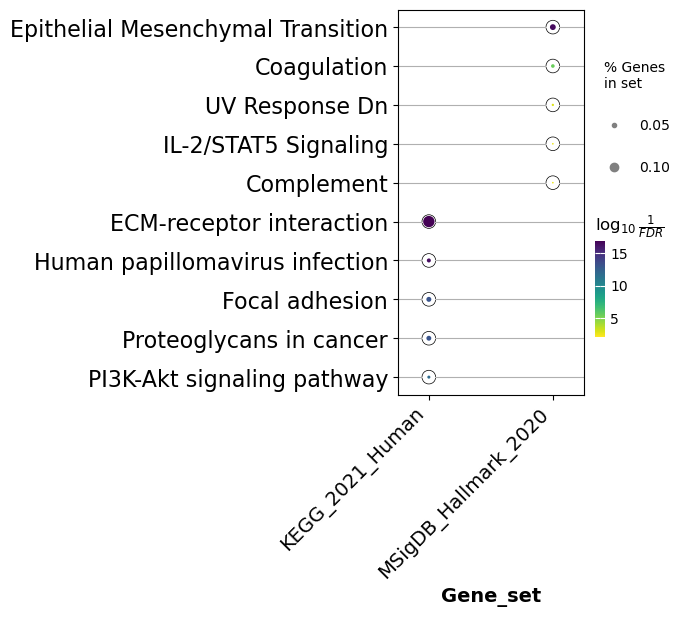

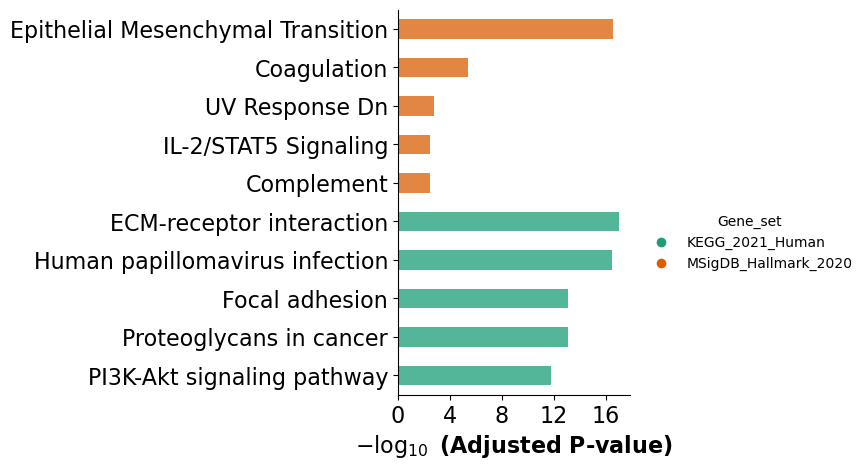

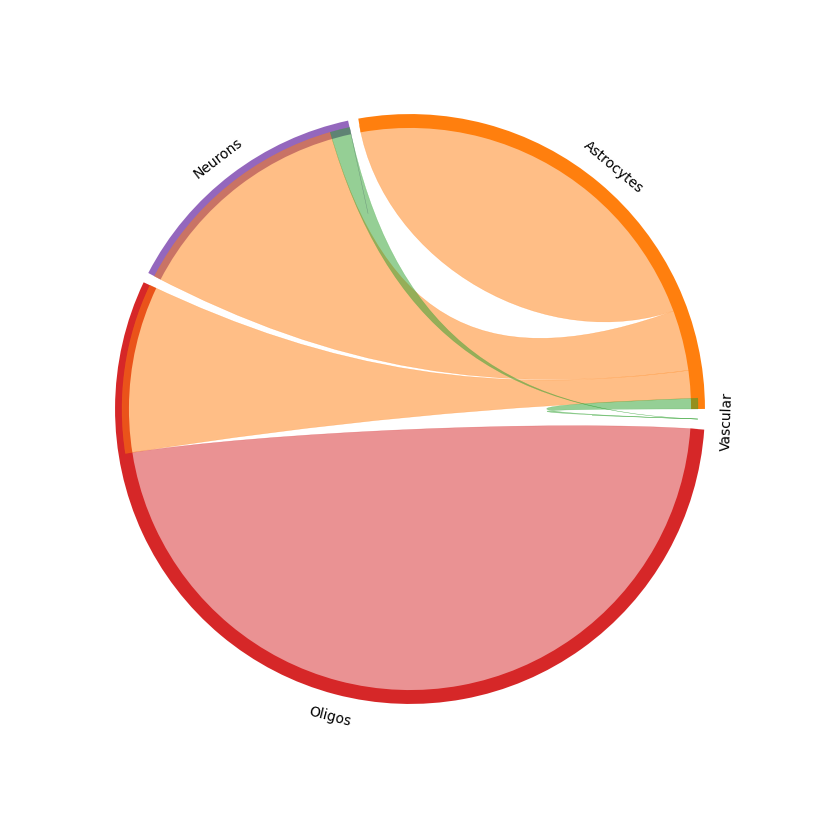


cluster4: Contains 47 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


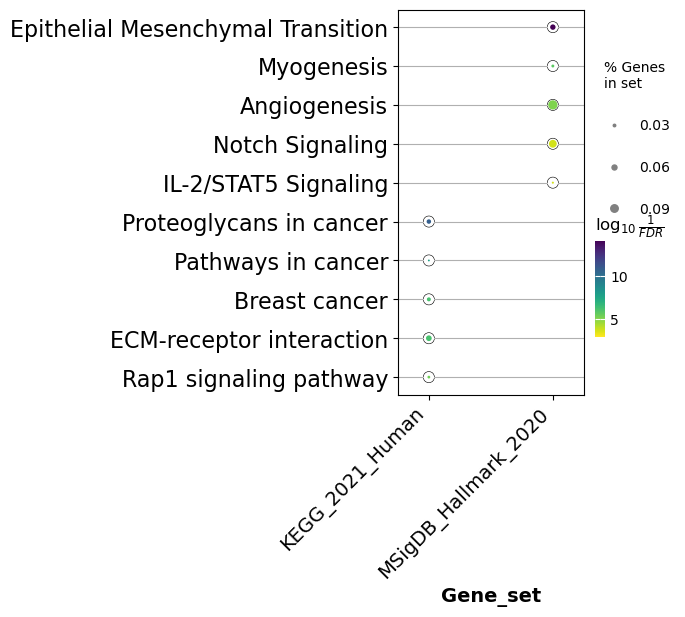

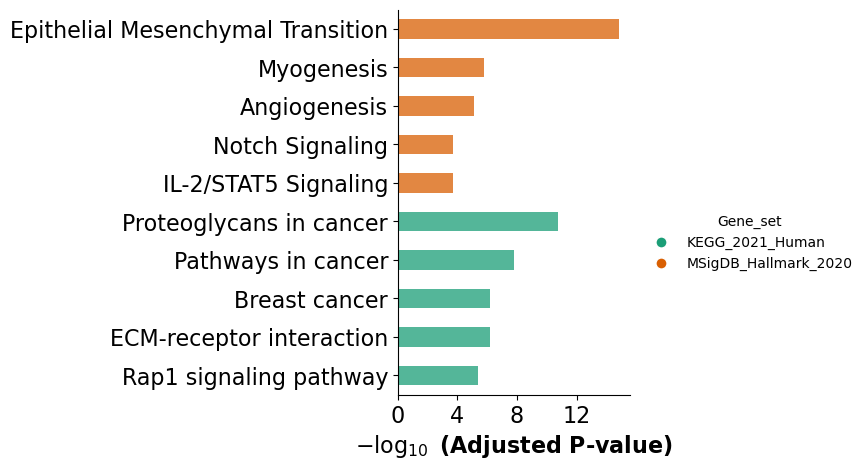

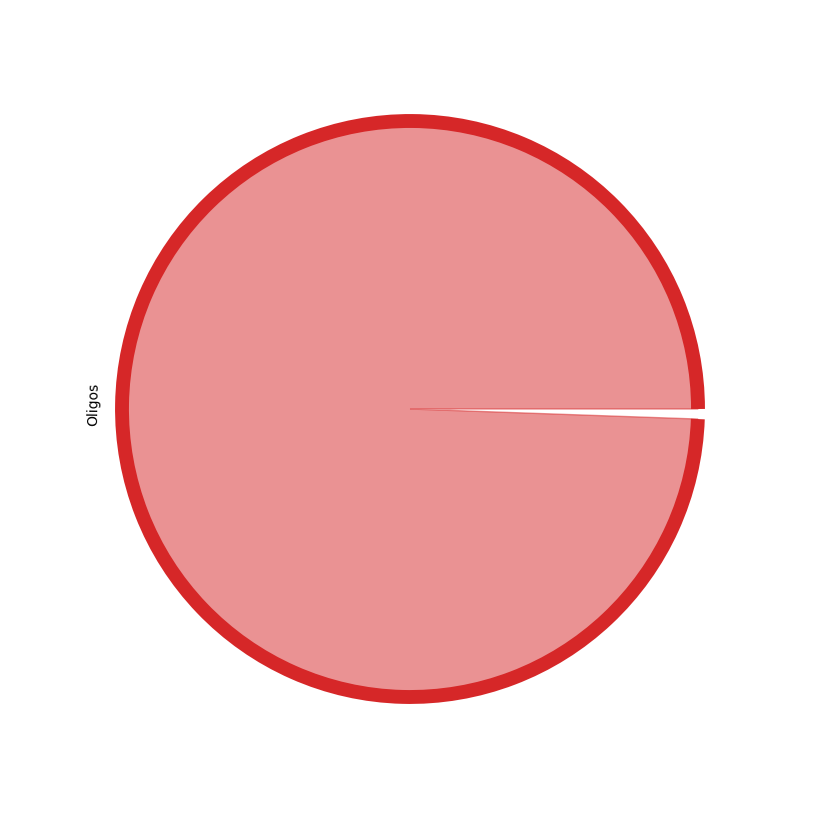


cluster5: Contains 31 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


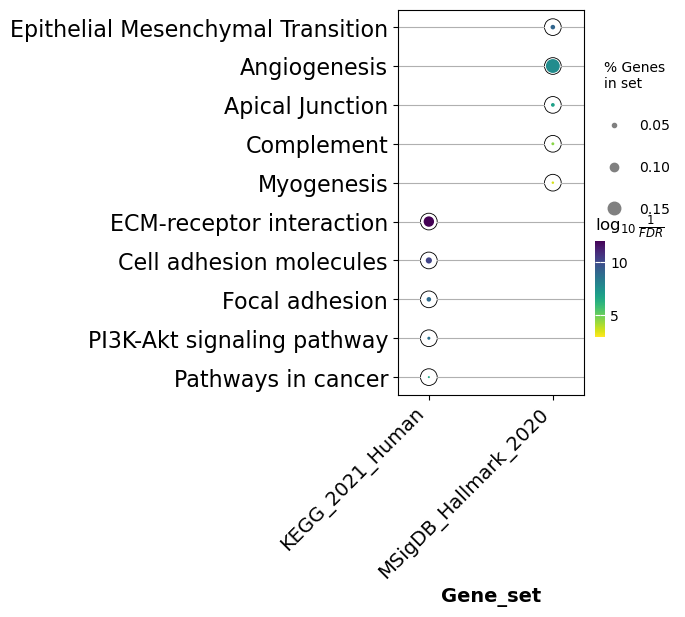

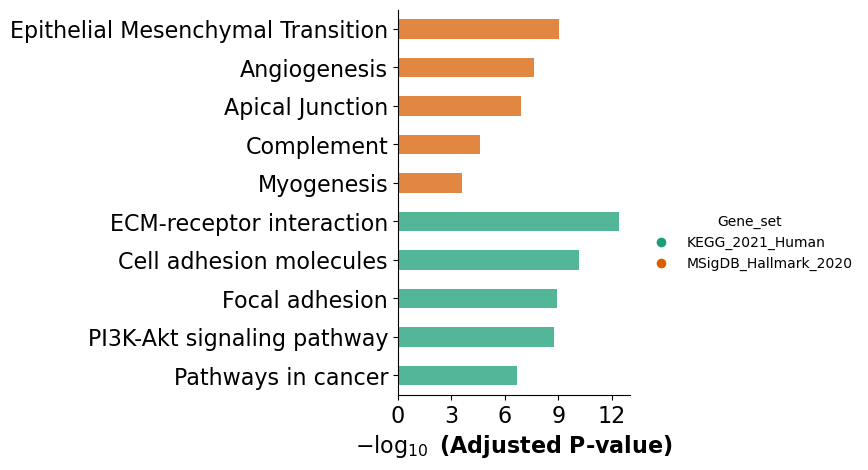

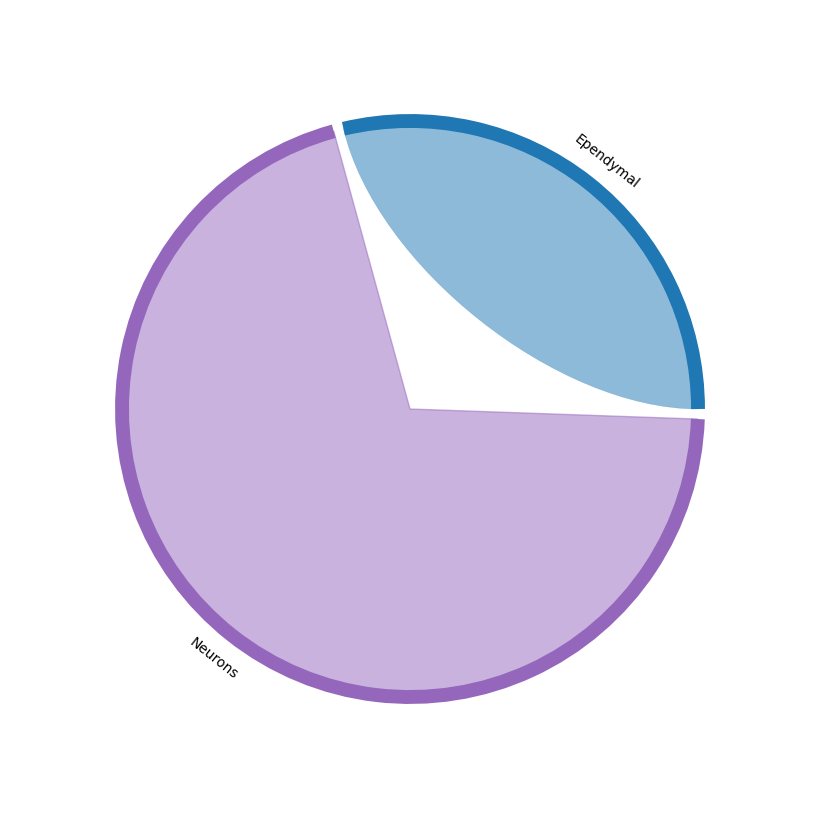


cluster6: Contains 27 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


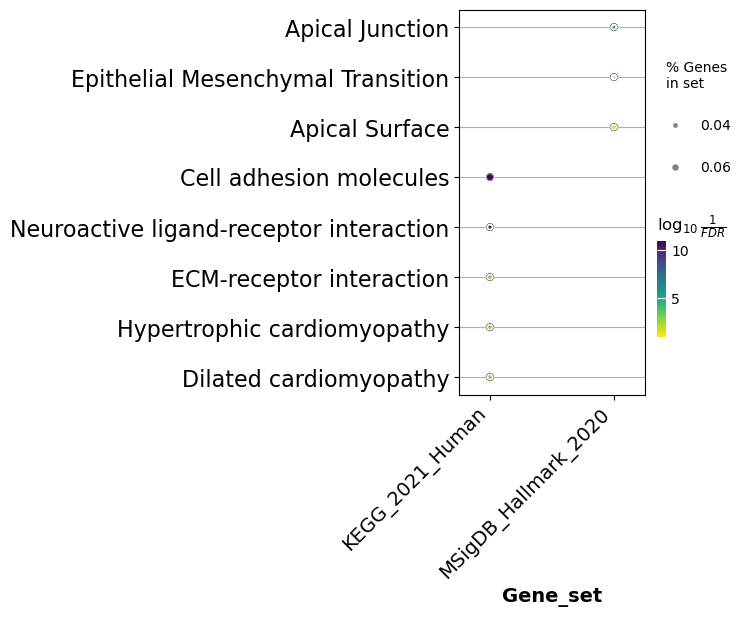

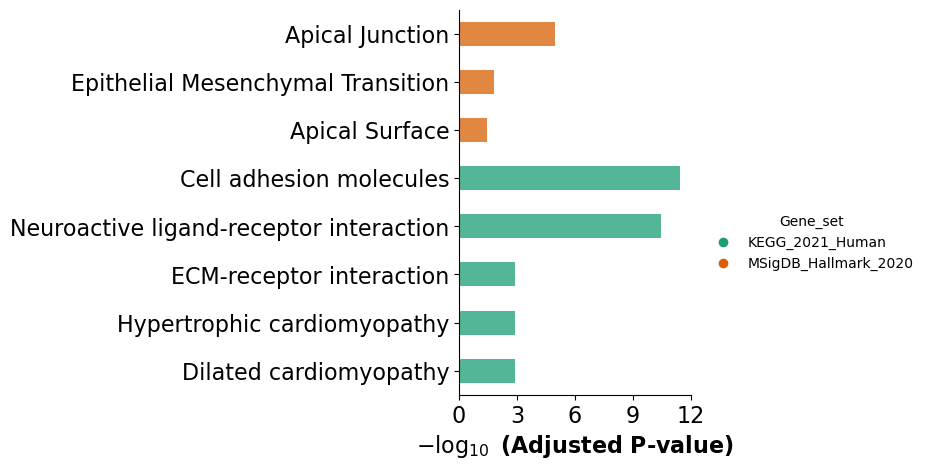

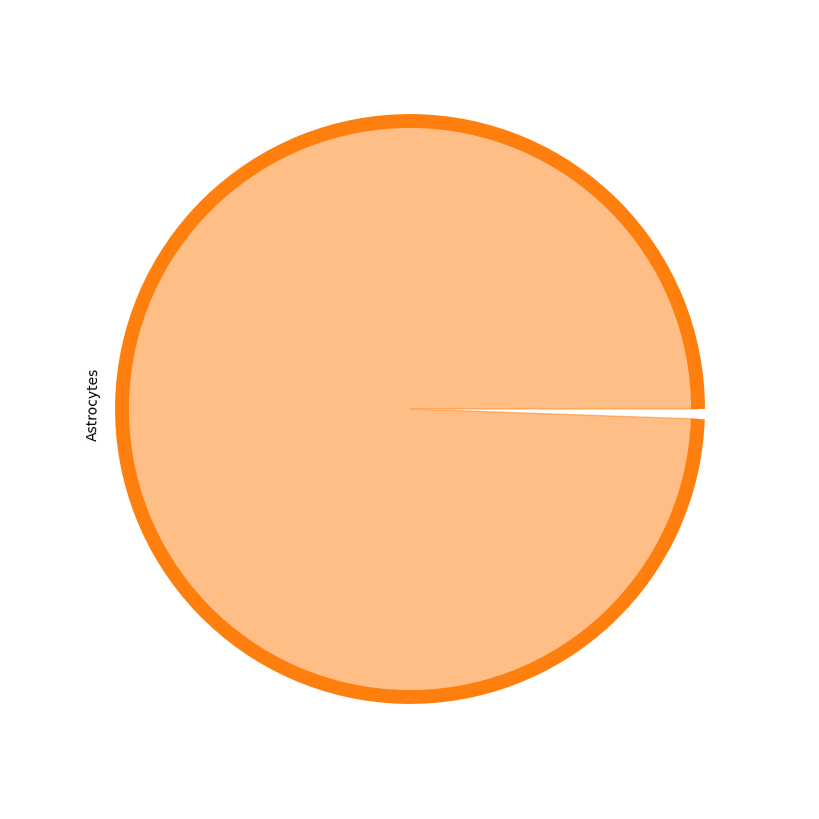


cluster7: Contains 49 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


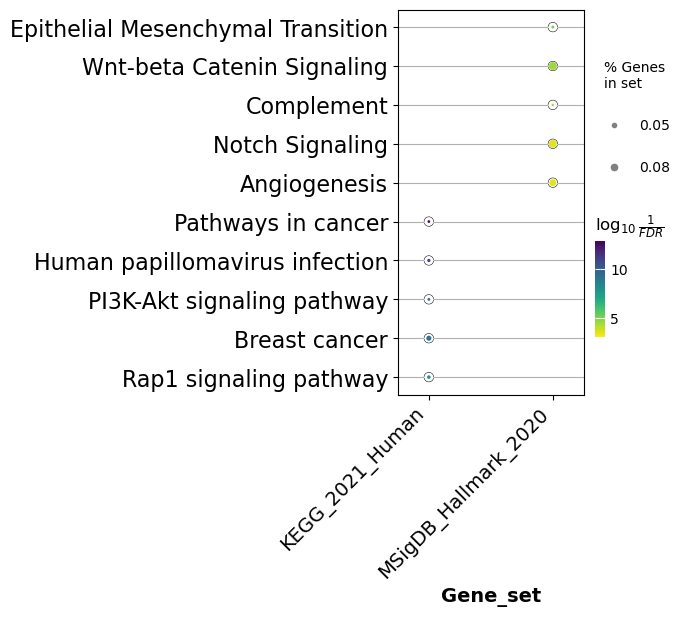

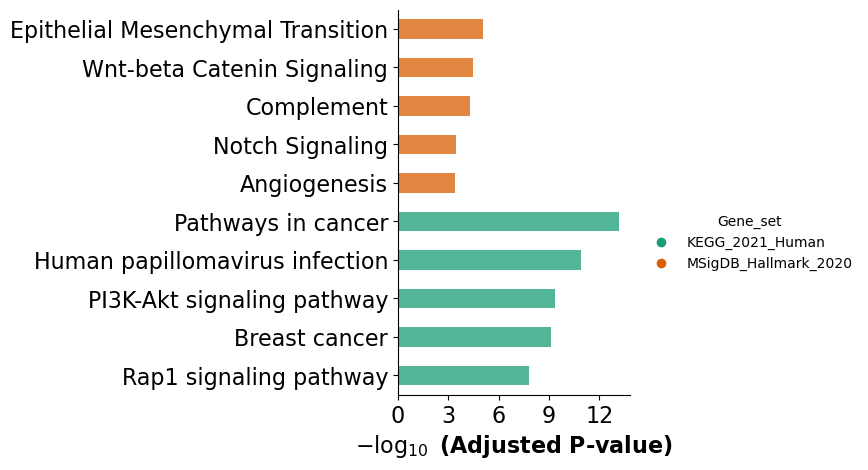

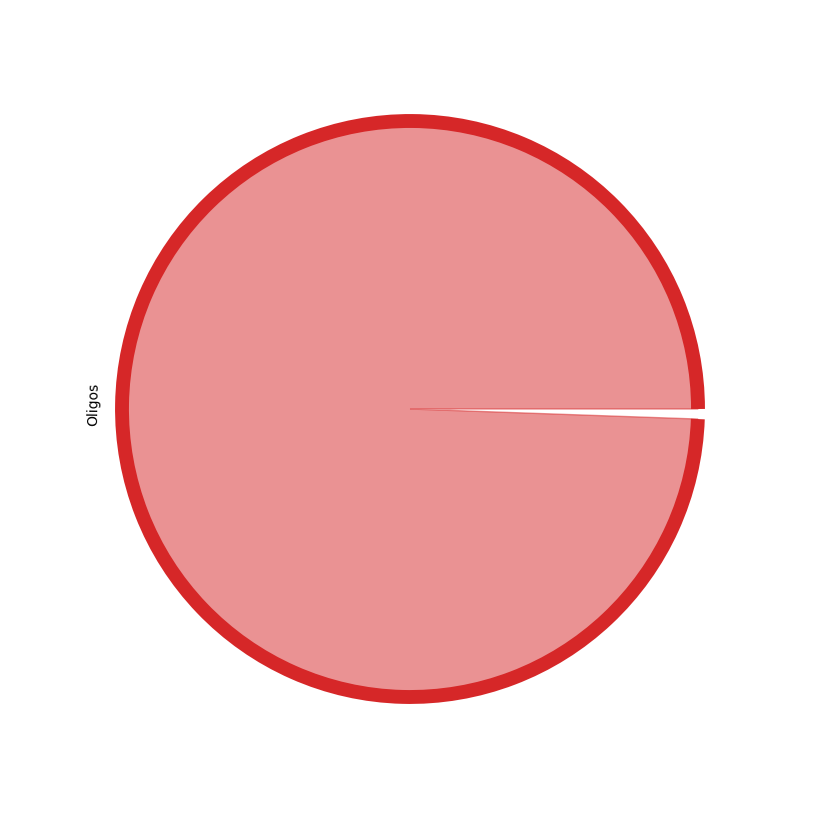

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


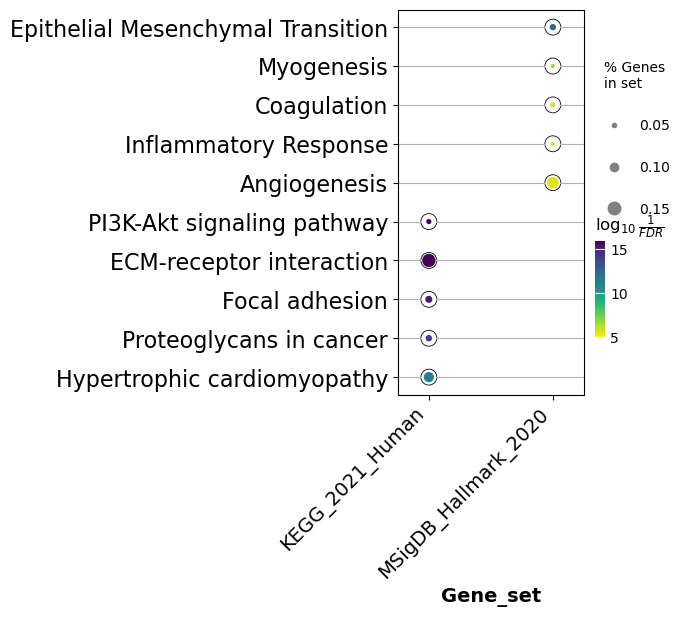

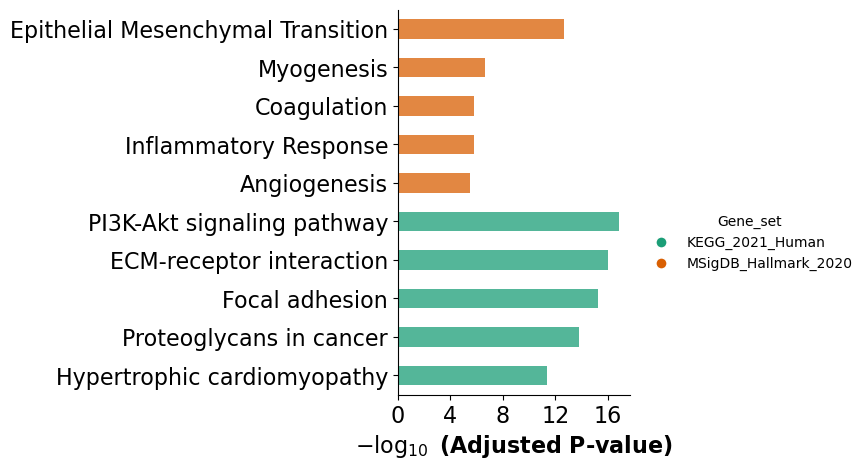

In [43]:
for cluster, matrix in aged_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(aged_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, colors=colors)
    mmcci.an.run_gsea(aged_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 37/37 [00:00<00:00, 74.18it/s]
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/uqlhocke/micromamba/envs/py-env/lib/pyth

Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 98/98 [00:03<00:00, 27.61it/s]
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...

cluster0: Contains 26 LR pairs


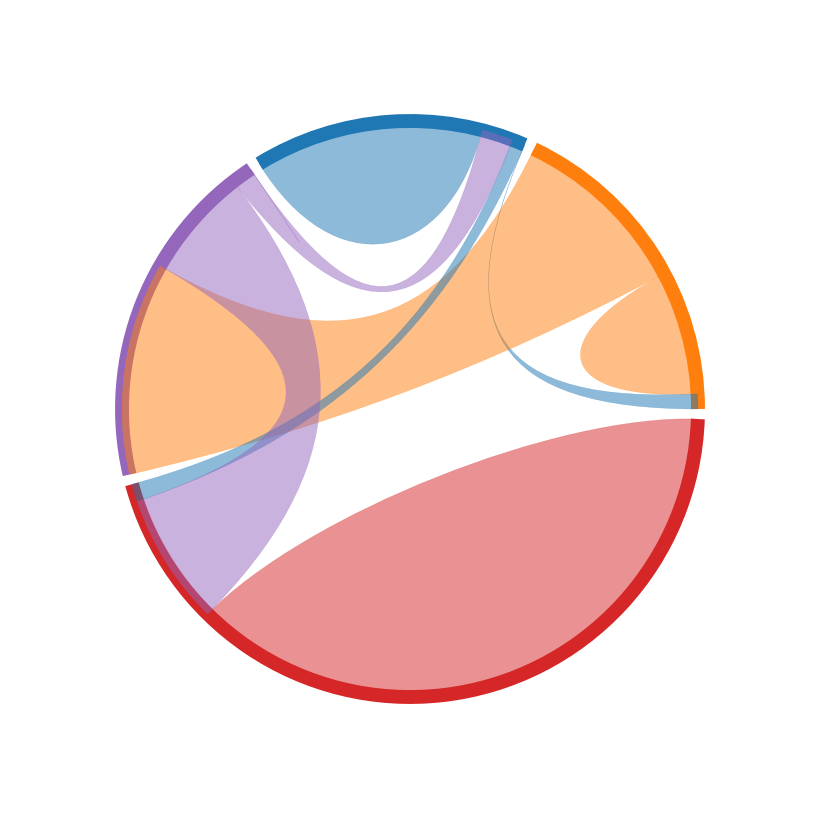


cluster1: Contains 11 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


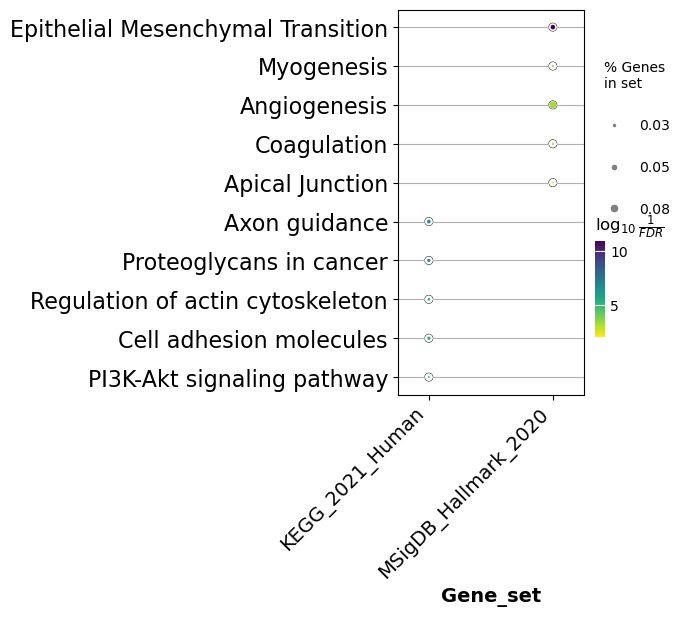

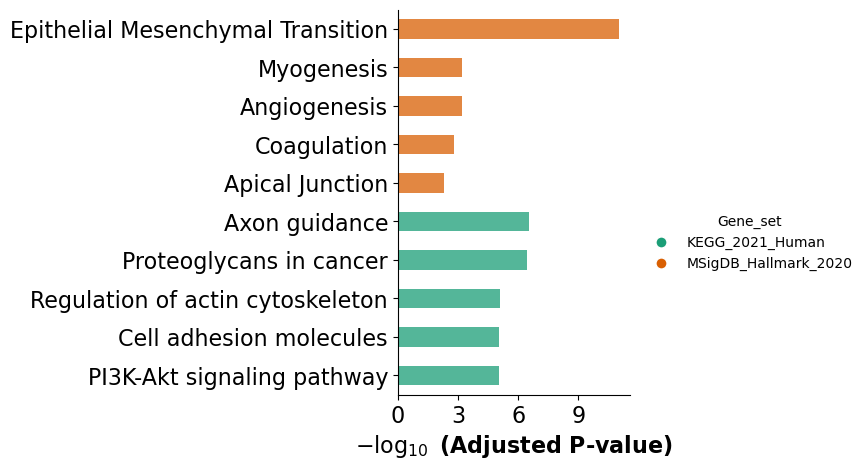

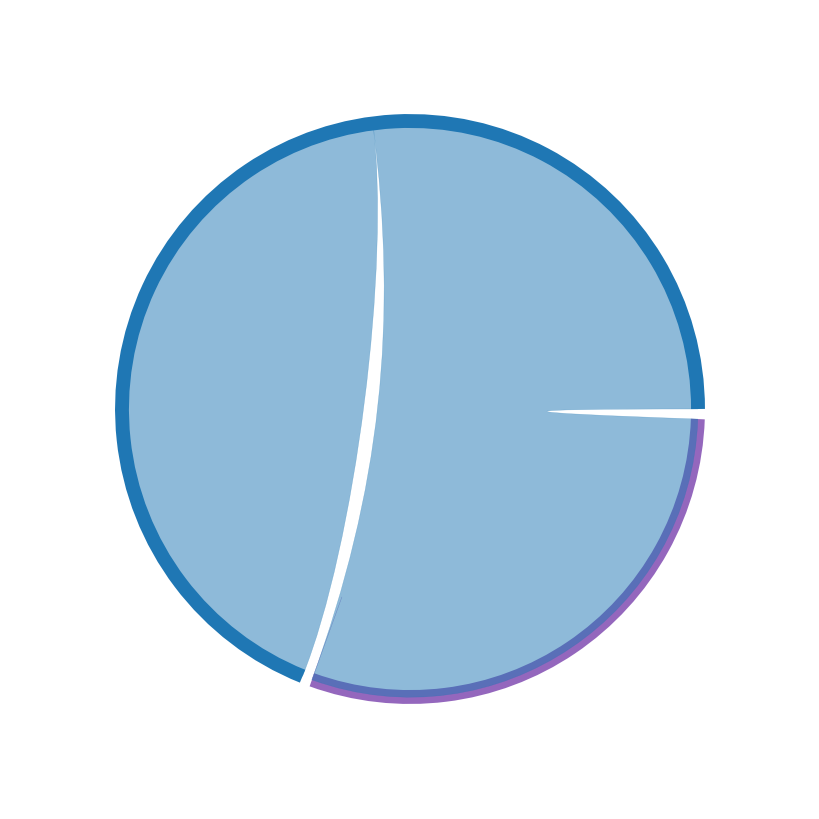


cluster2: Contains 61 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


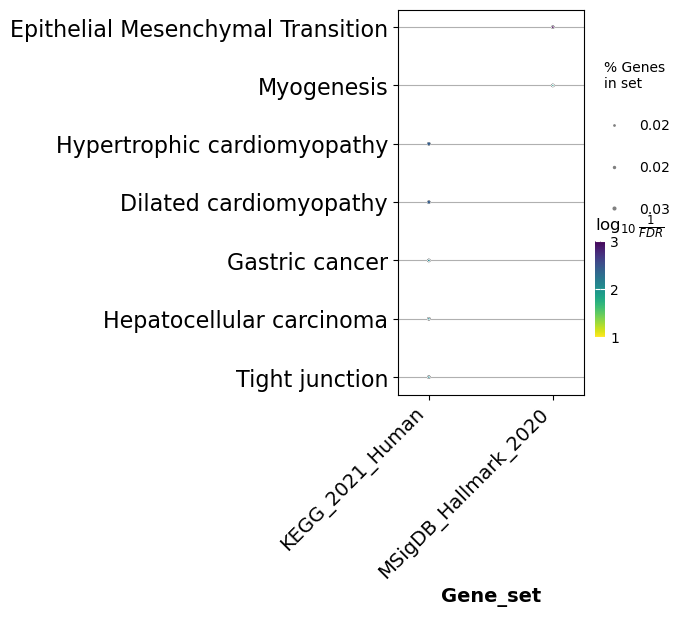

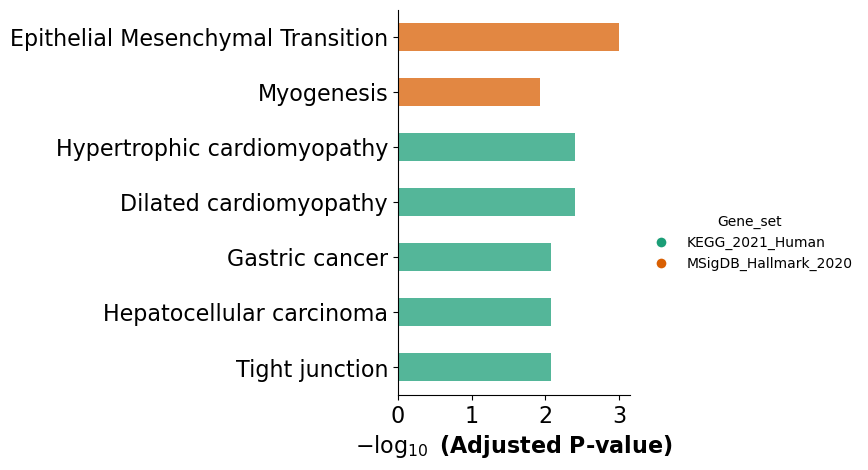

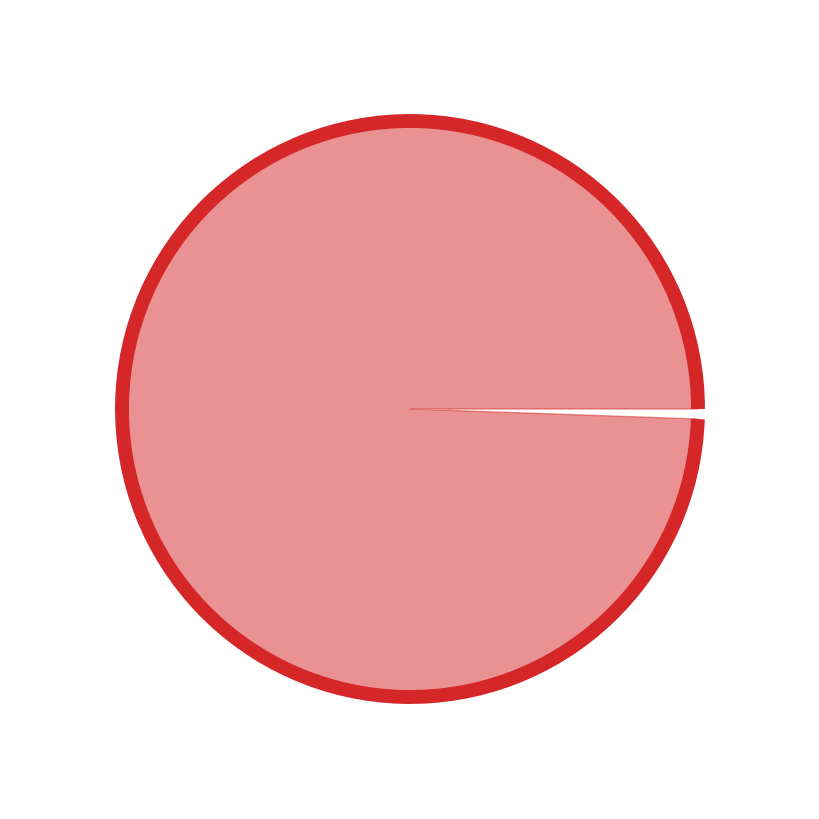


cluster3: Contains 37 LR pairs


/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


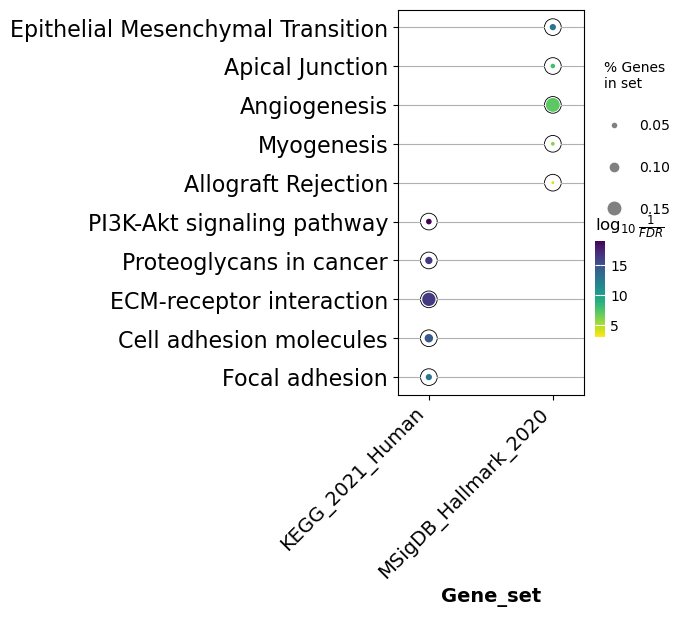

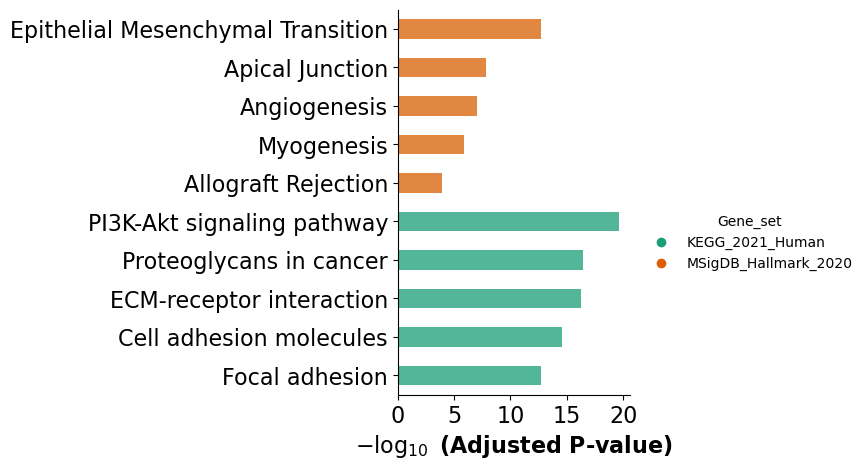

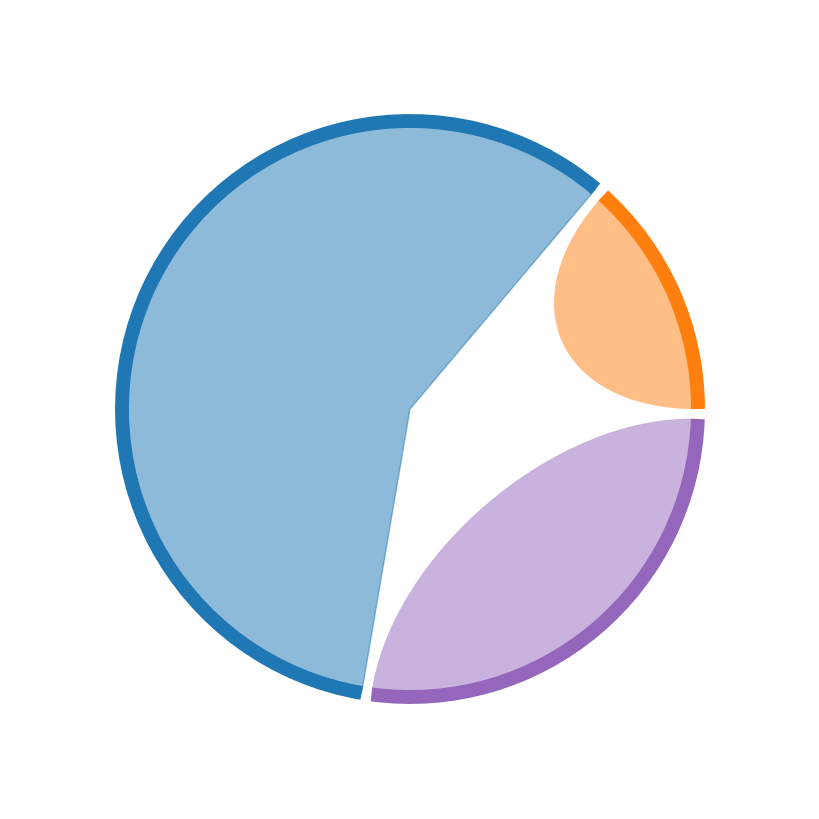

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


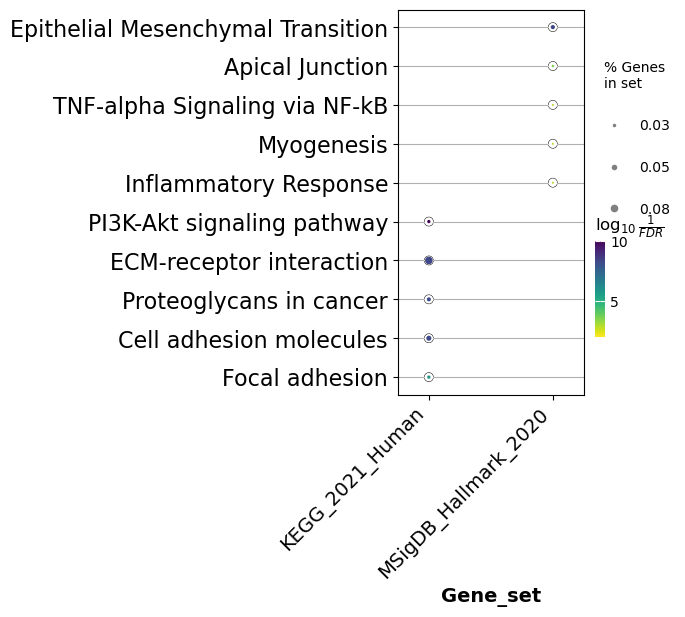

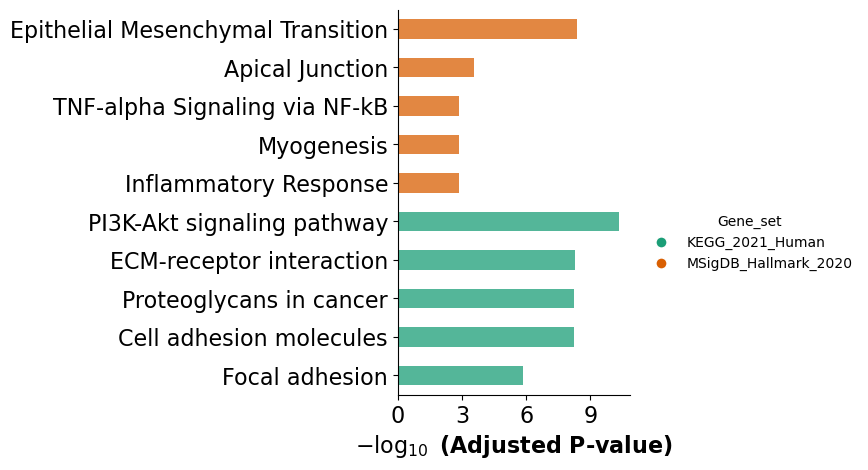

In [42]:
young_clusters = mmcci.an.lr_grouping(young_integrated, n_clusters=0)
young_integrated_clusters = mmcci.an.subset_clusters(young_integrated, young_clusters)
young_overall_clusters = mmcci.an.calculate_cluster_interactions(young_integrated_clusters)
        
for cluster, matrix in young_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, label_size=0, colors=colors)
    mmcci.an.run_gsea(young_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

The optimal number of clusters is: 4


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


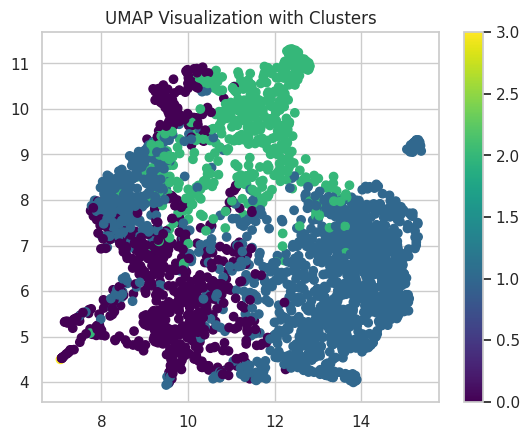

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


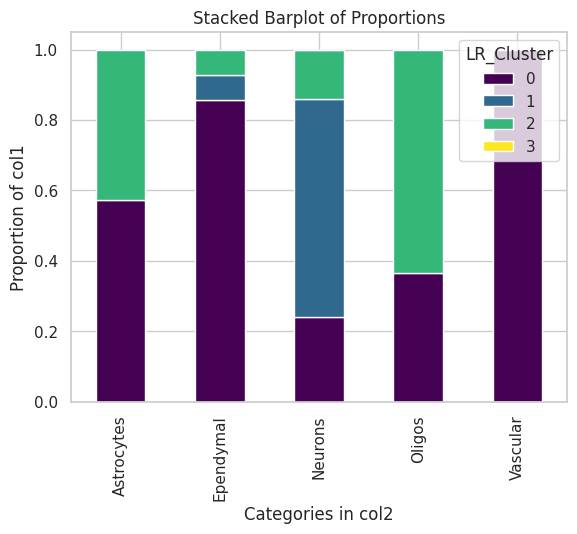

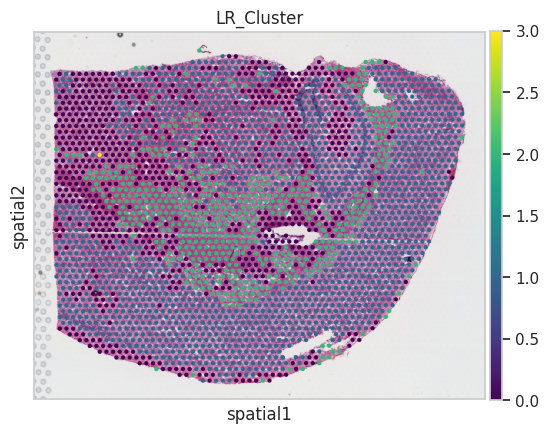

The optimal number of clusters is: 3


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


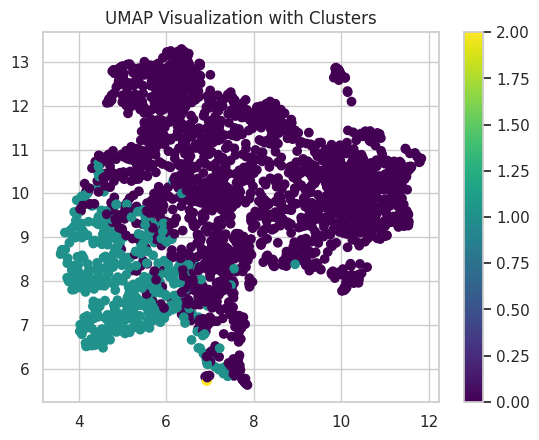

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


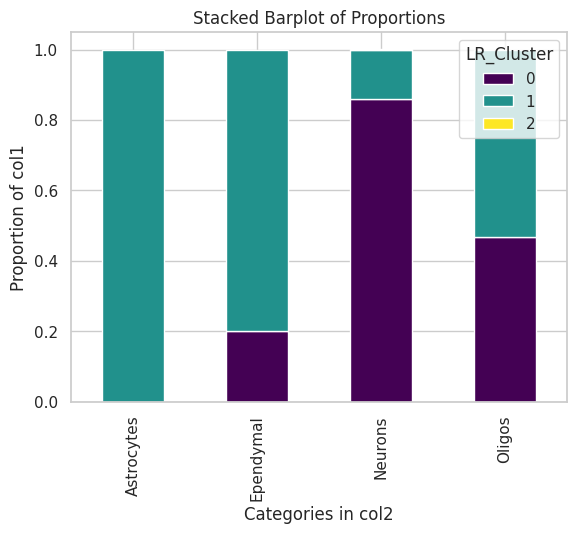

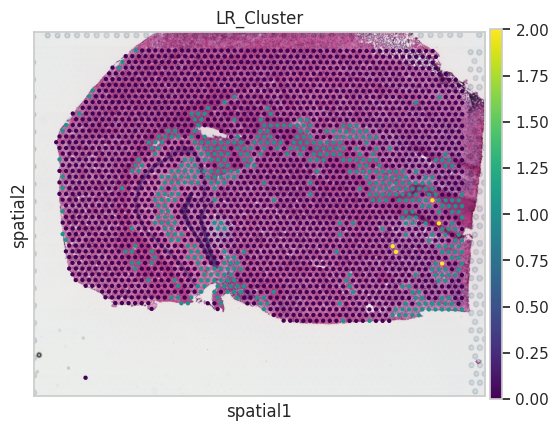

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


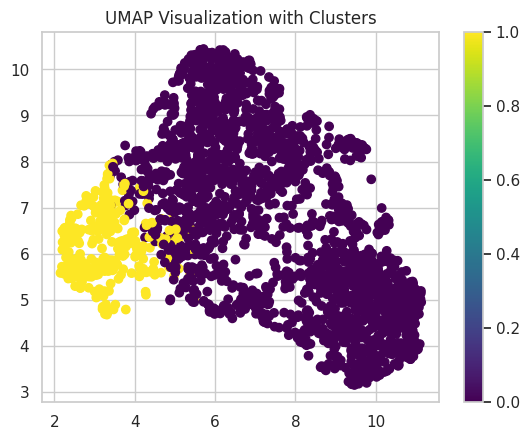

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


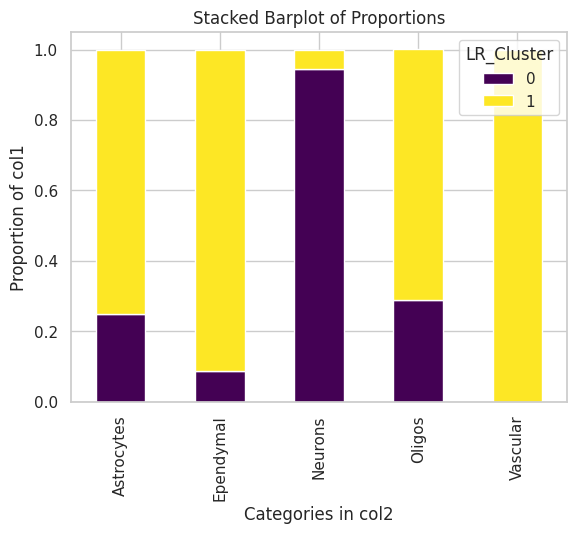

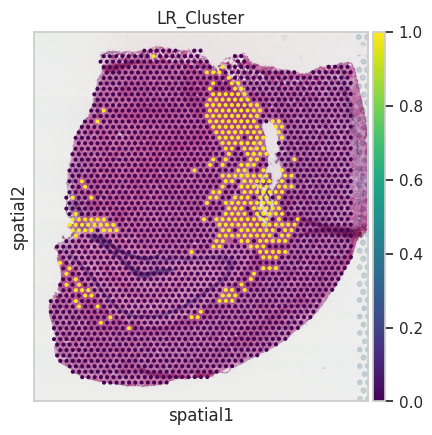

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


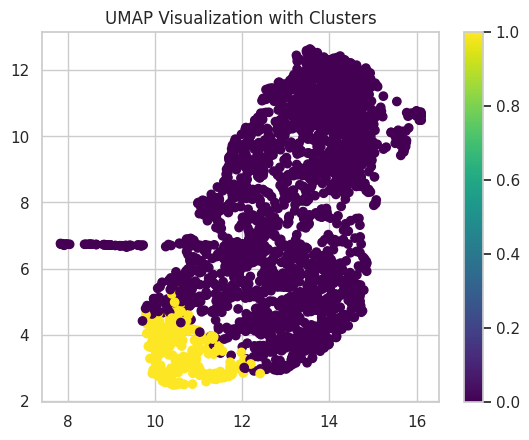

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


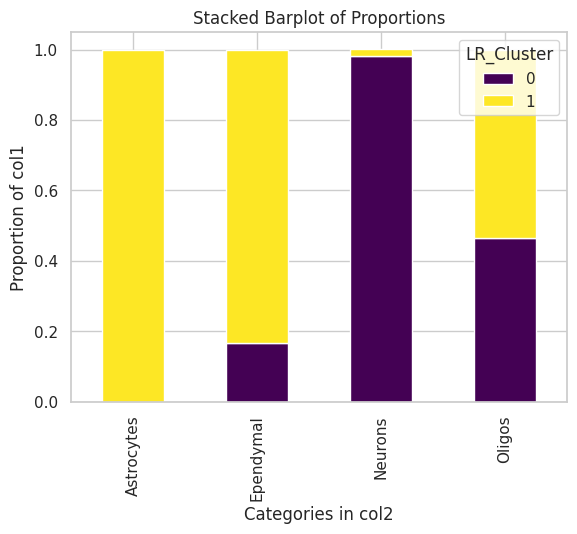

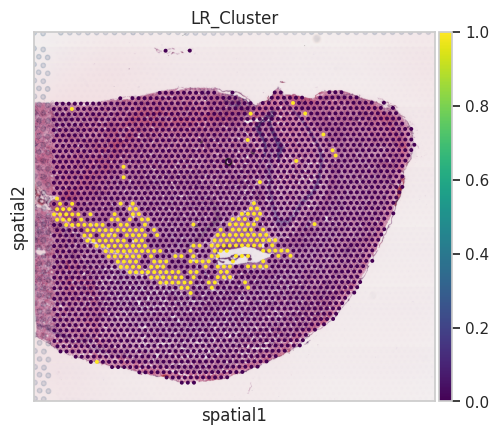

In [21]:
mmcci.an.lr_interaction_clustering(brain_aged_tech1)

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


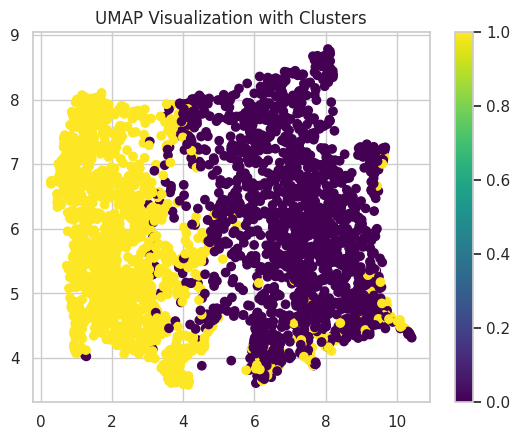

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


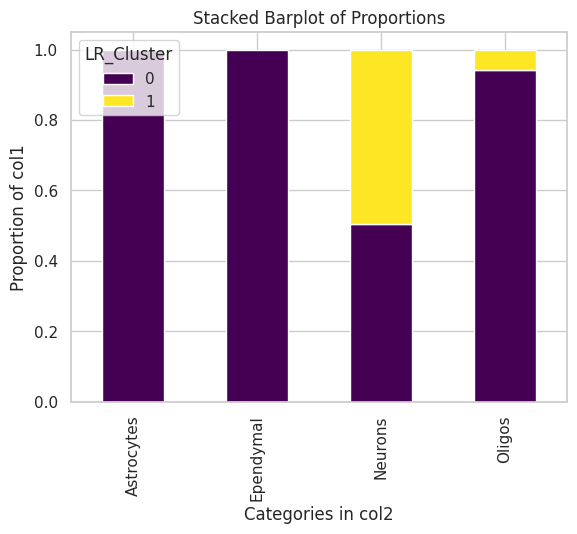

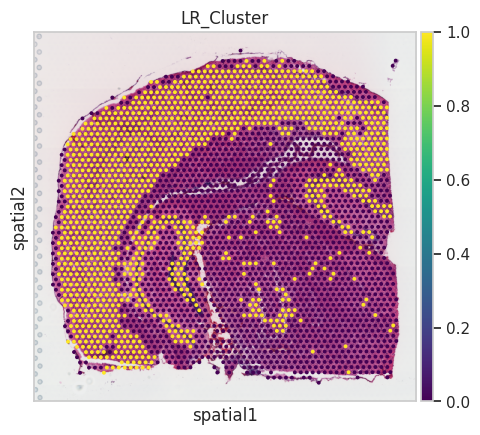

The optimal number of clusters is: 3


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


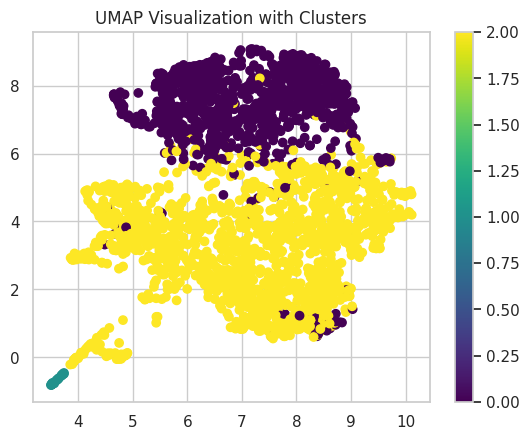

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


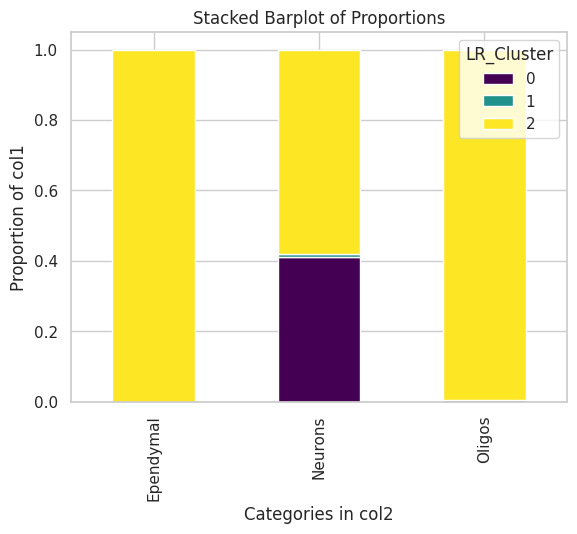

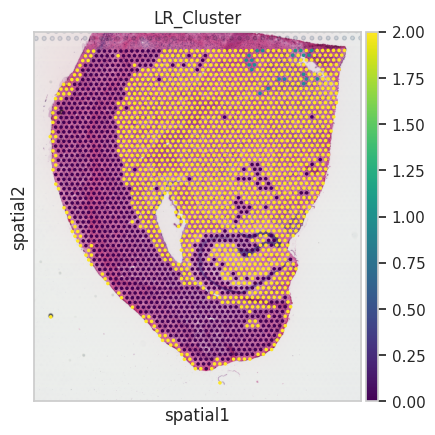

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


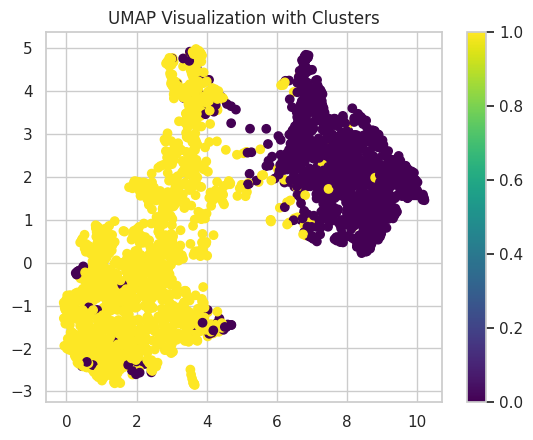

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


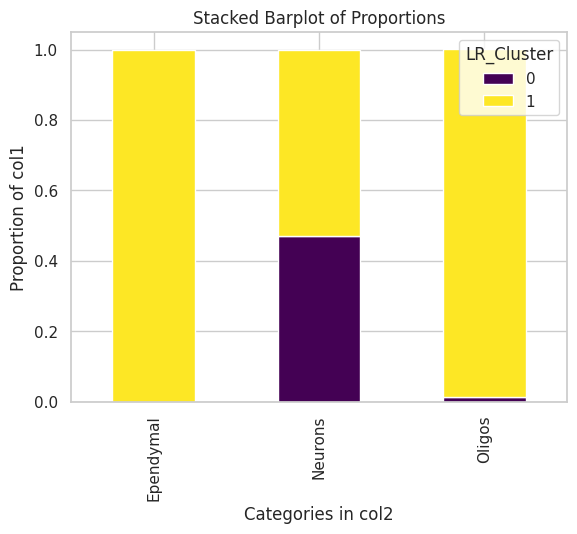

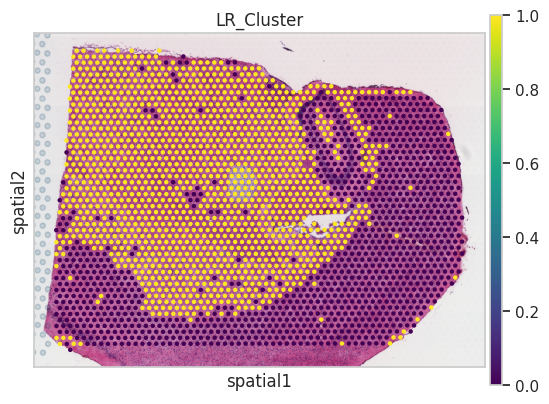

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


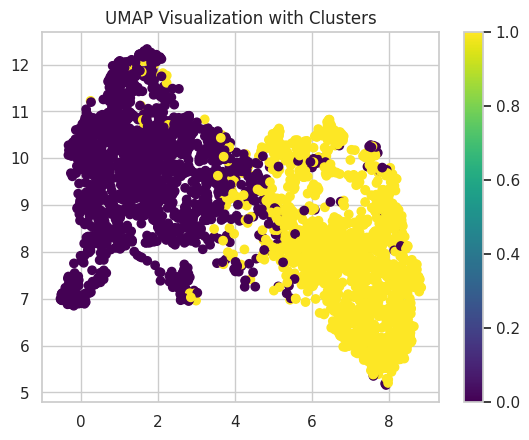

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:456: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


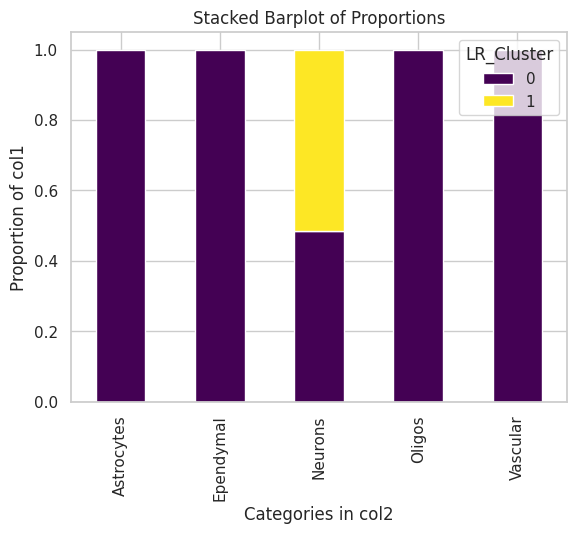

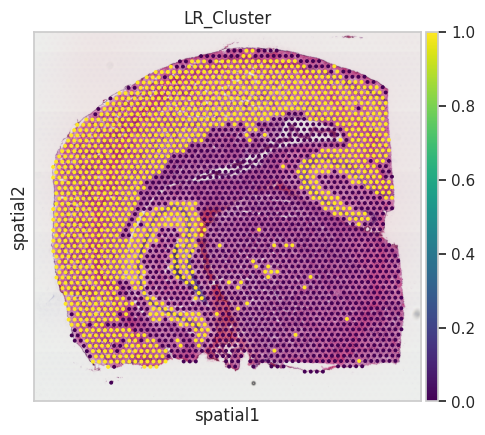

In [22]:
mmcci.an.lr_interaction_clustering(brain_young_tech1)

#### Run GSEA Analysis on Clusters

In [ ]:
mmcci.an.run_gsea(aged_integrated_clusters[0])